In [53]:
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt

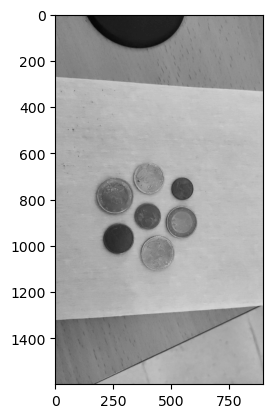

In [54]:
src1 = cv.imread("imagenes/moneda_servilleta.jpg")
fondo = cv.cvtColor(src1, cv.COLOR_RGB2GRAY)
plt.imshow(fondo, cmap='gray')


Text(0.5, 1.0, 'Opening')

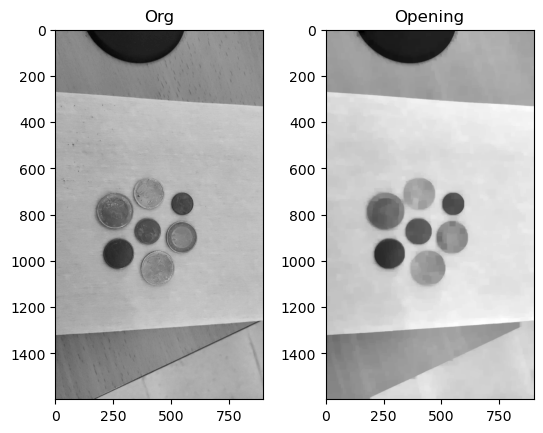

In [55]:
kernel = np.ones((5,5),np.uint8)

img2 = cv.morphologyEx(fondo, cv.MORPH_OPEN, kernel, iterations=3) # limpiamos fondo
img2 = cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel, iterations=5) # limpiamos letras
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('')

ax1.imshow(fondo, cmap='gray')
ax1.set_title("Org")
ax2.imshow(img2, cmap='gray')
ax2.set_title("Opening")

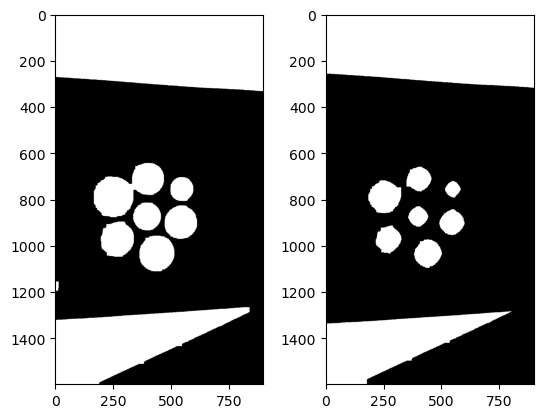

In [99]:
min, max, minLoc, maxLoc = cv.minMaxLoc(img2)
#umbral = (min + max)//2
#umbral = 127
media, desviacion = cv.meanStdDev(img2)
umbral = media


img2[img2 <= umbral] = 0
img2[img2 > umbral] = 255
img3 = cv.bitwise_not(img2)



kernel = np.ones((30,30), np.uint8)
erosion= cv.erode(img3,kernel, iterations=1)
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.imshow(img3,cmap='gray')
ax2.imshow(erosion,cmap='gray')




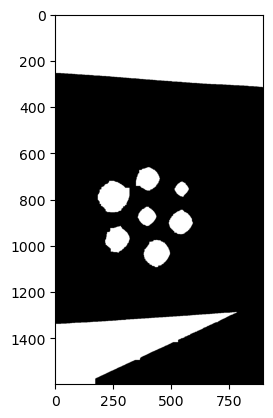

In [101]:
#otra forma
img4 = cv.bitwise_not(img2)
th1 = cv.adaptiveThreshold(img4, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 1411, 1)
plt.imshow(th1,cmap='gray')
kernel = np.ones((35,35), np.uint8)
erosion= cv.erode(th1,kernel, iterations=1)
plt.imshow(erosion,cmap='gray')